<a href="https://colab.research.google.com/github/soumyb09/soumyb09/blob/tensorflow/improved_CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf

In [4]:
# additional imports

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model

In [5]:
#loding data
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
print("x_train.shape:", x_train.shape)
print("y_train.shape", y_train.shape)

170500096/170498071 [==============================] - 11s 0us/step
x_train.shape: (50000, 32, 32, 3)
y_train.shape (50000,)


In [6]:
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


In [7]:
# Build the model using the functional API
i = Input(shape=x_train[0].shape)
# x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
# x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
# x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)

# x = GlobalMaxPooling2D()(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [8]:
# Compile and fit
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50)

Epoch 1/50
1563/1563 [==============================] - 24s 15ms/step - loss: 1.3078 - accuracy: 0.5504 - val_loss: 1.5028 - val_accuracy: 0.5072
Epoch 2/50
1563/1563 [==============================] - 23s 15ms/step - loss: 0.8429 - accuracy: 0.7063 - val_loss: 0.8559 - val_accuracy: 0.7067
Epoch 3/50
1563/1563 [==============================] - 23s 15ms/step - loss: 0.6886 - accuracy: 0.7635 - val_loss: 0.8130 - val_accuracy: 0.7227
Epoch 4/50
1563/1563 [==============================] - 23s 15ms/step - loss: 0.5817 - accuracy: 0.7987 - val_loss: 0.6188 - val_accuracy: 0.7894
Epoch 5/50
1563/1563 [==============================] - 23s 15ms/step - loss: 0.4905 - accuracy: 0.8313 - val_loss: 0.6349 - val_accuracy: 0.7991
Epoch 6/50
1563/1563 [==============================] - 23s 15ms/step - loss: 0.4151 - accuracy: 0.8570 - val_loss: 0.8248 - val_accuracy: 0.7395
Epoch 7/50
1563/1563 [==============================] - 23s 15ms/step - loss: 0.3489 - accuracy: 0.8784 - val_loss: 0.6099 -

In [12]:
# Fit with data augmentation
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size
r = model.fit(train_generator, validation_data=(x_test, y_test), steps_per_epoch=steps_per_epoch, epochs=50)

Epoch 1/50
1562/1562 [==============================] - 56s 36ms/step - loss: 0.1693 - accuracy: 0.9424 - val_loss: 0.4452 - val_accuracy: 0.8796
Epoch 2/50
1562/1562 [==============================] - 46s 29ms/step - loss: 0.1603 - accuracy: 0.9463 - val_loss: 0.4147 - val_accuracy: 0.8713
Epoch 3/50
1562/1562 [==============================] - 46s 29ms/step - loss: 0.1607 - accuracy: 0.9467 - val_loss: 0.4207 - val_accuracy: 0.8743
Epoch 4/50
1562/1562 [==============================] - 45s 29ms/step - loss: 0.1526 - accuracy: 0.9506 - val_loss: 0.4391 - val_accuracy: 0.8883
Epoch 5/50
1562/1562 [==============================] - 45s 29ms/step - loss: 0.1603 - accuracy: 0.9463 - val_loss: 0.4399 - val_accuracy: 0.8821
Epoch 6/50
1562/1562 [==============================] - 45s 29ms/step - loss: 0.1576 - accuracy: 0.9477 - val_loss: 0.4719 - val_accuracy: 0.8867
Epoch 7/50
1562/1562 [==============================] - 45s 29ms/step - loss: 0.1488 - accuracy: 0.9505 - val_loss: 0.4355 -

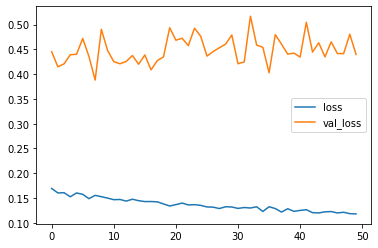

In [13]:
#plotting loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

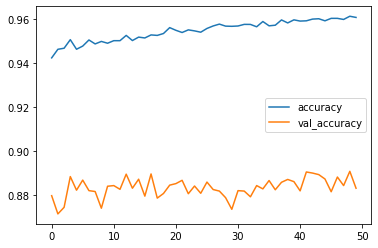

In [14]:
#plotting accuracy per iteration
plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')
plt.legend()

In [15]:
print(model.evaluate(x_test, y_test)) #evaluating model

313/313 [==============================] - 2s 6ms/step - loss: 0.4397 - accuracy: 0.8830
[0.43965184688568115, 0.8830000162124634]


Confusion matrix, without normalization
[[889   4  40   6   4   4   7  12  21  13]
 [  4 963   2   1   0   0   1   0   3  26]
 [ 16   2 817  32  31  26  61   7   5   3]
 [ 10   1  28 759  29  76  66  13   6  12]
 [  7   0  20  29 882  12  40   9   1   0]
 [  5   0  13  99  26 804  28  15   2   8]
 [  3   2  11  17   5   3 955   0   1   3]
 [ 10   0  14  20  24  21   7 898   2   4]
 [ 35   8   3   4   2   0   5   1 927  15]
 [  4  47   0   1   1   1   3   2   5 936]]


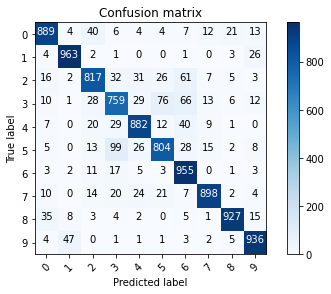

In [16]:
# confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [17]:
# label mapping
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

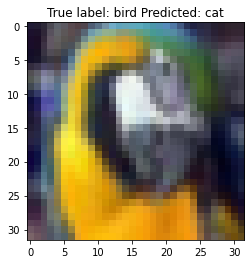

In [18]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));

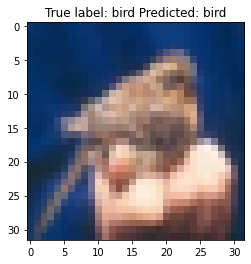

In [19]:
classified_idx = np.where(p_test == y_test)[0]
i = np.random.choice(classified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));